In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from skimage.io import imread
from skimage import img_as_ubyte

In [4]:
root = "/home/jack/workspace/own/cell-tracker"
data_path = os.path.join(root, "data/")
patterns_path = os.path.join(data_path, "patterns.tif")
cells_path = os.path.join(data_path, "cells.tif")  

In [5]:
def imshow(image, title='', cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [6]:
gray_image = imread(patterns_path)
gray_image = img_as_ubyte(gray_image)

In [7]:
def create_contours(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [8]:
contours = create_contours(gray_image)

In [9]:
def create_mask(image, contour):
    mask = np.zeros_like(image, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
    return mask

In [10]:
cells_stack = imread(cells_path)

In [11]:
def bounding_box(contour):
    x, y, w, h = cv2.boundingRect(contour)
    return x, y, w, h

def crop_image(image, x, y, w, h):
    return image[y:y+h, x:x+w]


In [12]:
def extract_cell(cells_stack, frm_idx, bb, mask):
    cells_image = img_as_ubyte(cells_stack[frm_idx])
    # mask_crop = crop_image(mask, *bb)
    cell_crop = crop_image(cells_image, *bb)
    # cell = cv2.bitwise_and(mask_crop, cell_crop)
    cell = cell_crop
    return cell

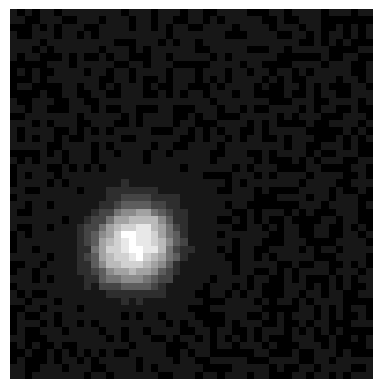

In [13]:
mask = create_mask(gray_image, contours[10])
bb = bounding_box(contours[10])
cell = extract_cell(cells_stack, 2, bb, mask)
imshow(cell)

In [66]:
def segment_cell(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 6, 255, cv2.THRESH_TOZERO)
    # imshow(thresh)
    _, thresh = cv2.threshold(blurred, 8, 255, cv2.THRESH_BINARY)
    # imshow(thresh)
    num_labels, markers = cv2.connectedComponents(thresh)
    return num_labels, markers

In [67]:
def analyze(pattern_image, cell_stack, contour_idx, cell_idx):
    mask = create_mask(pattern_image, contours[contour_idx])
    bb = bounding_box(contours[contour_idx])
    cell = extract_cell(cell_stack, cell_idx, bb, mask)
    num_labels, markers = segment_cell(cell)
    if num_labels-1 == 3:
        imshow(cell)
        print(contour_idx, cell_idx)
    return None

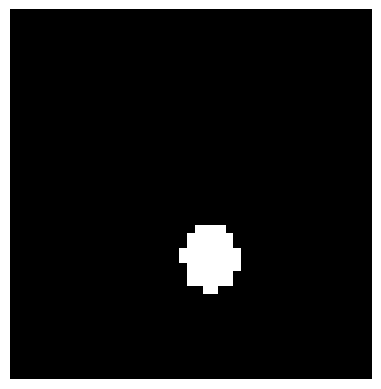

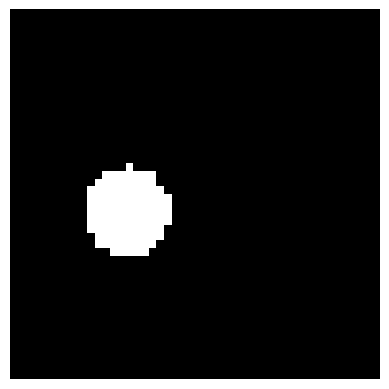

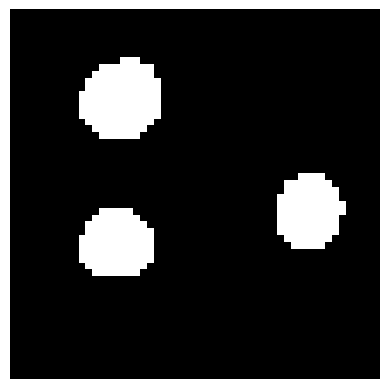

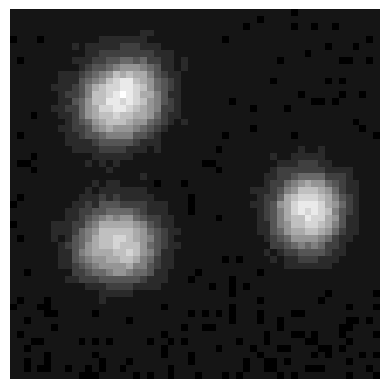

2 0


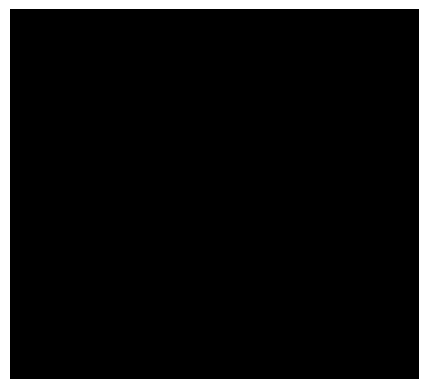

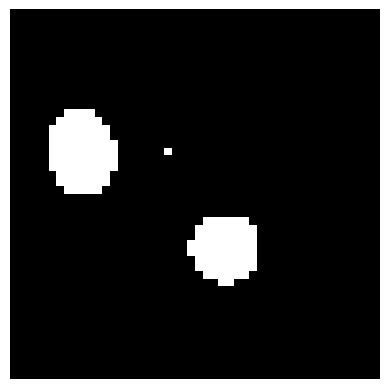

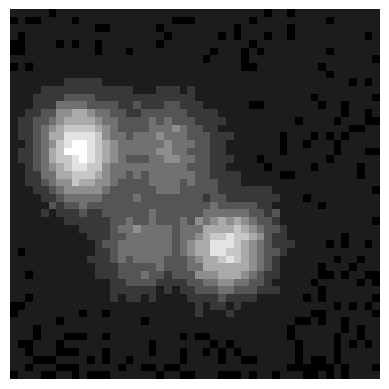

4 0


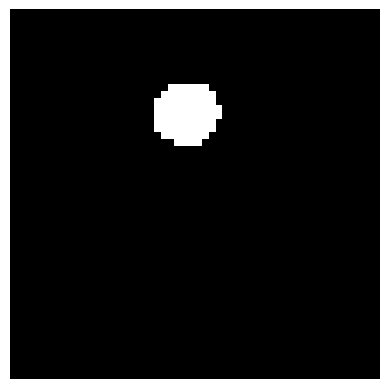

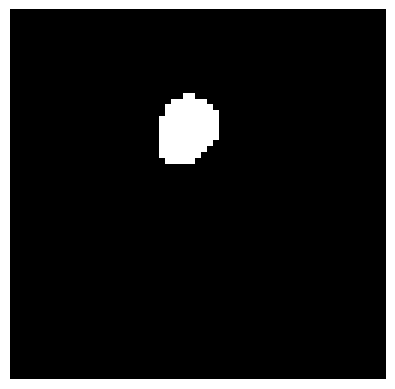

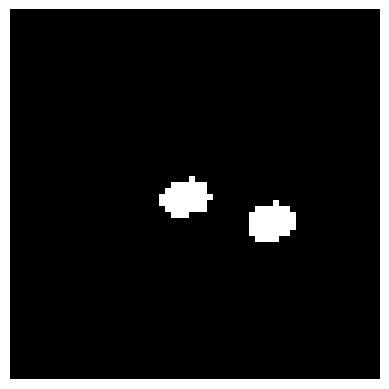

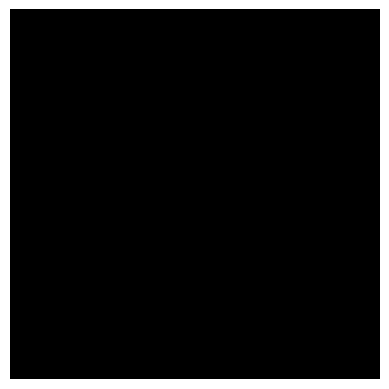

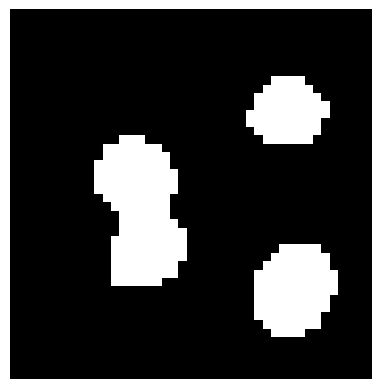

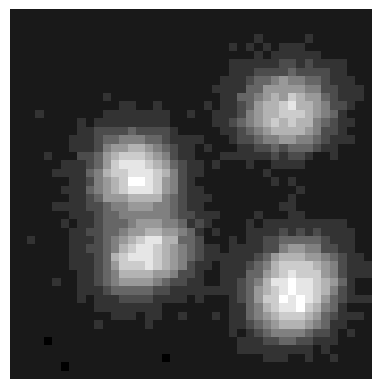

9 0


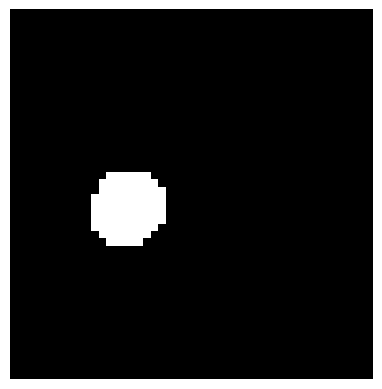

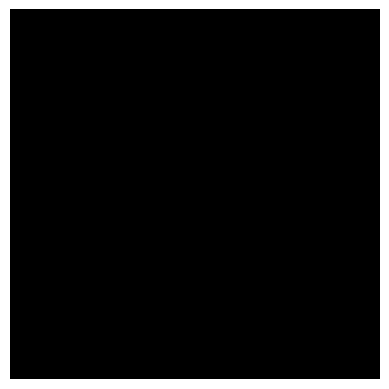

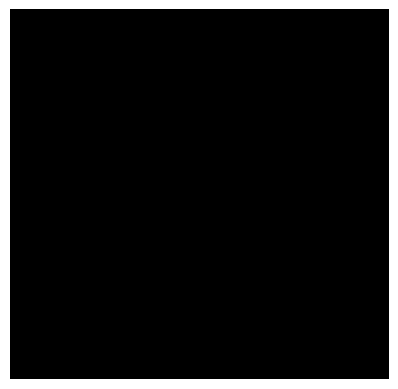

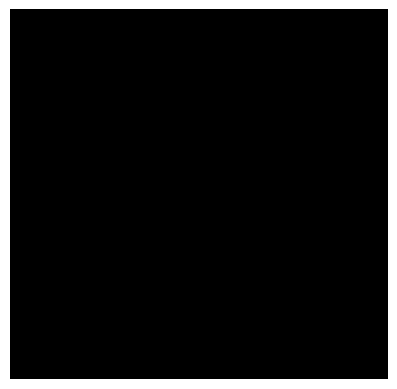

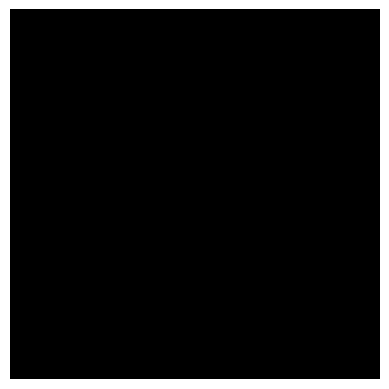

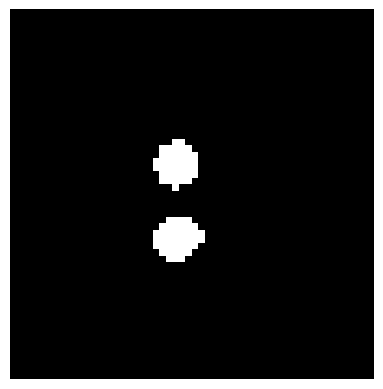

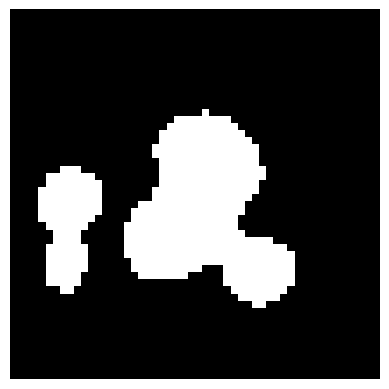

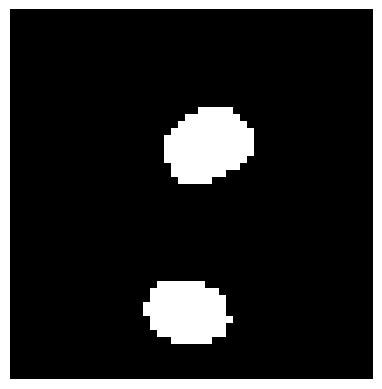

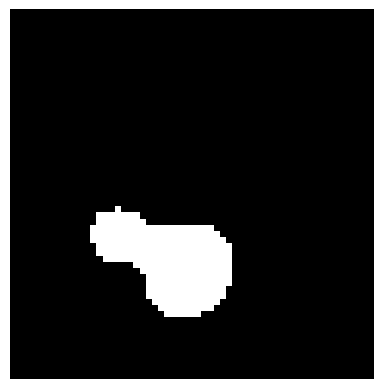

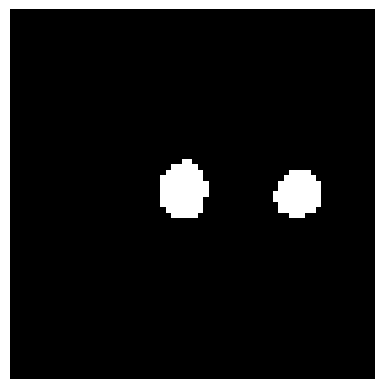

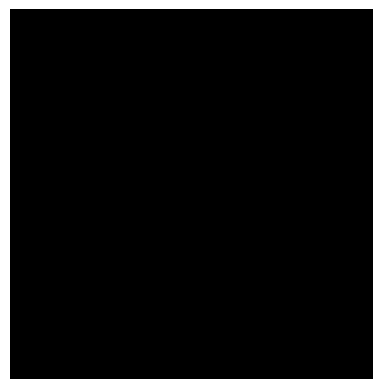

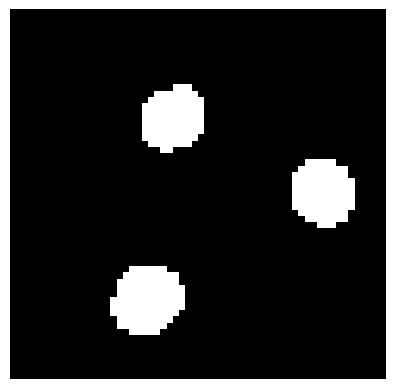

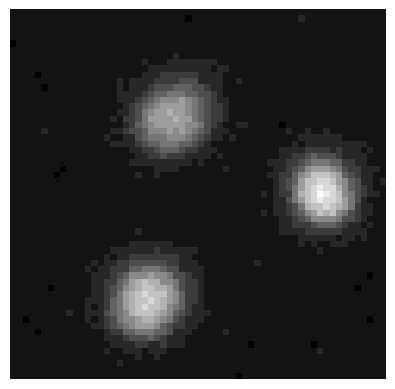

21 0


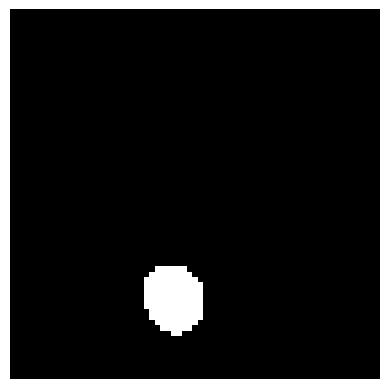

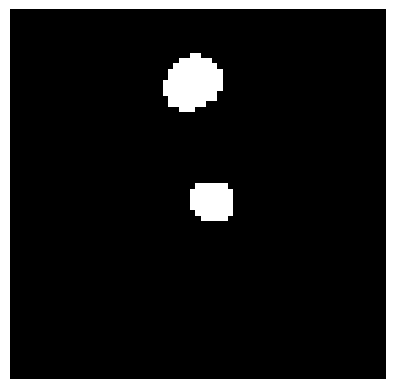

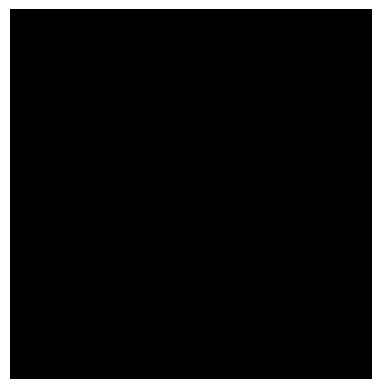

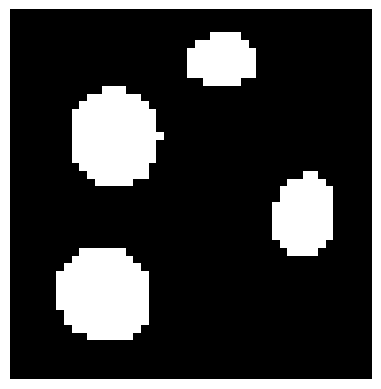

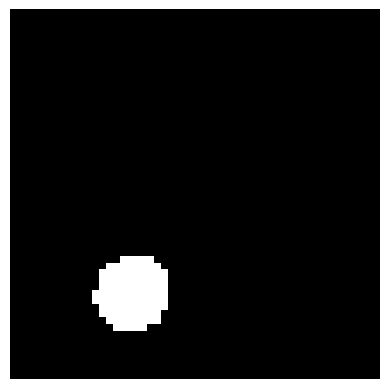

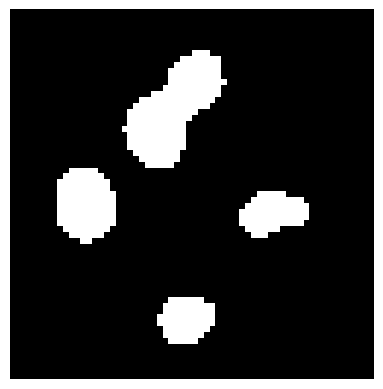

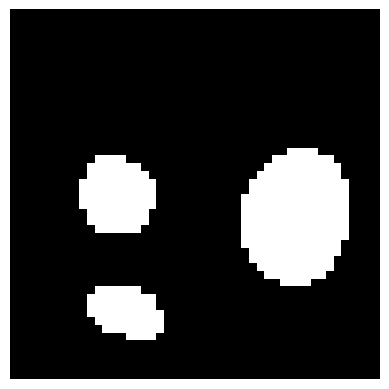

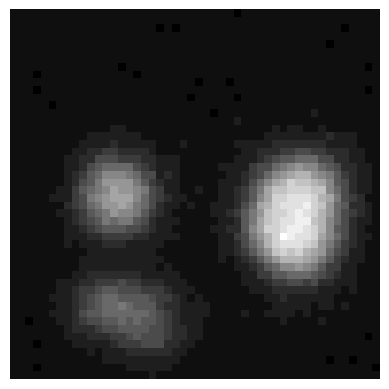

28 0


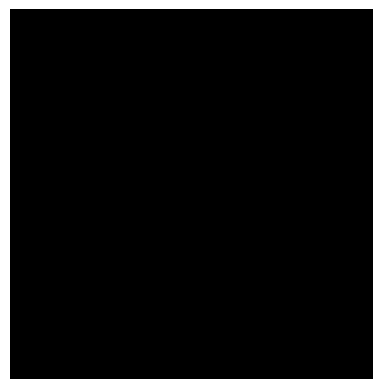

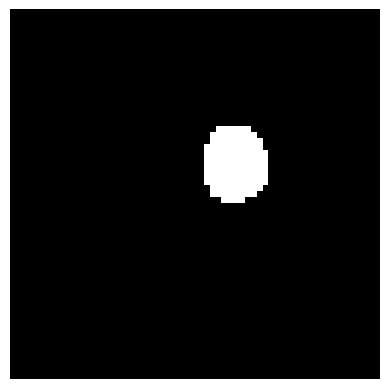

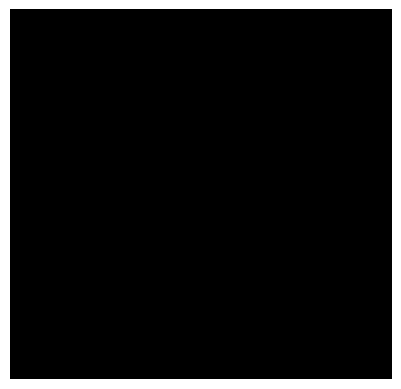

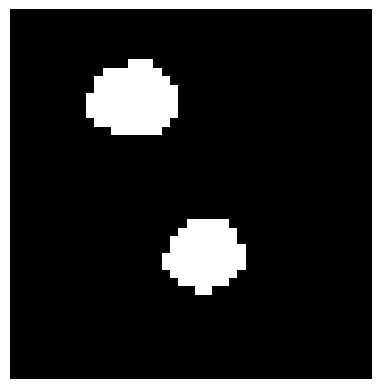

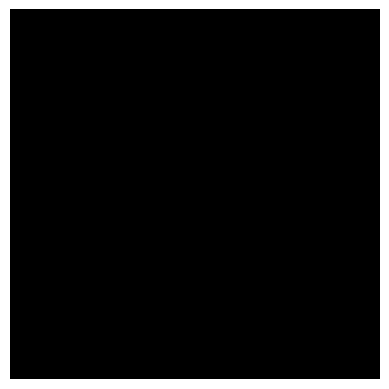

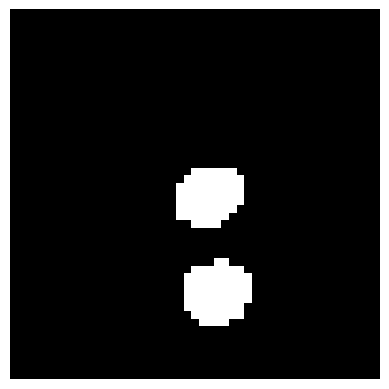

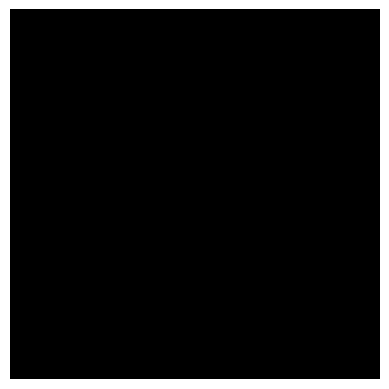

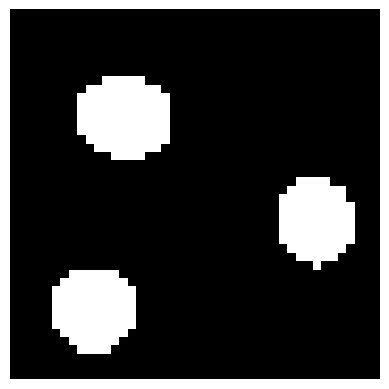

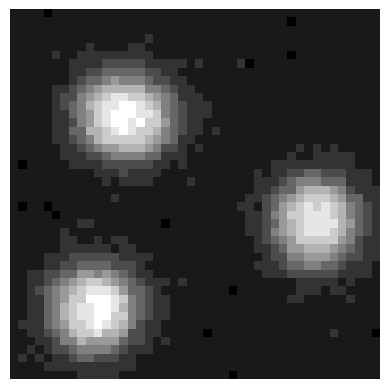

36 0


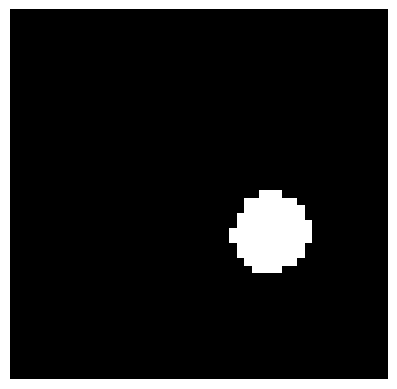

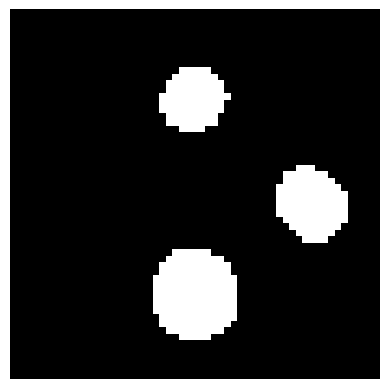

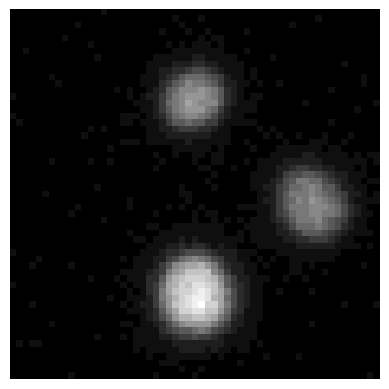

38 0


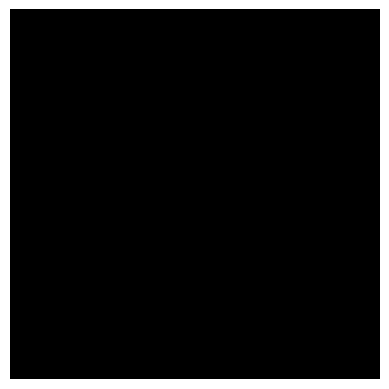

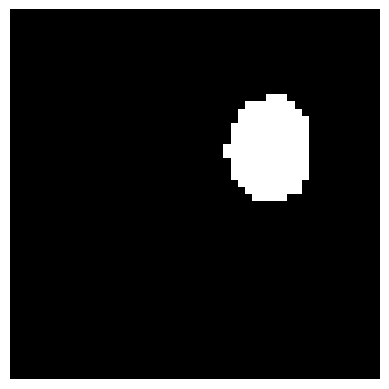

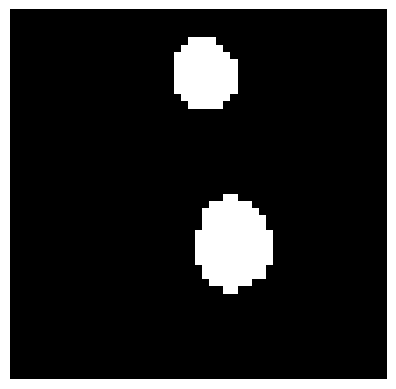

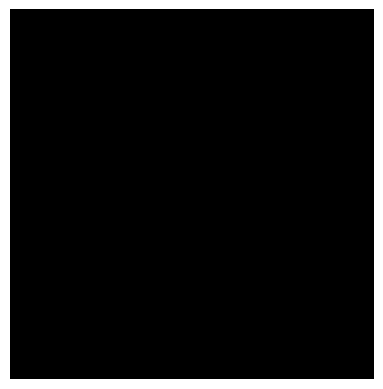

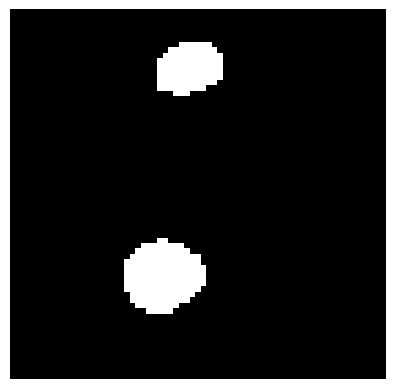

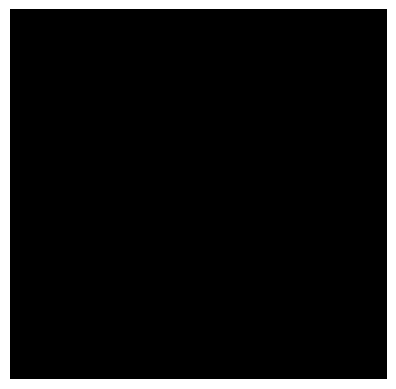

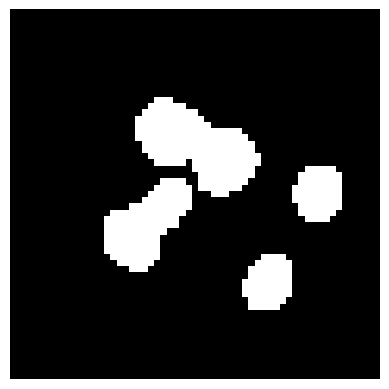

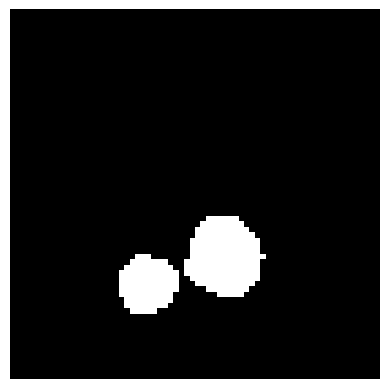

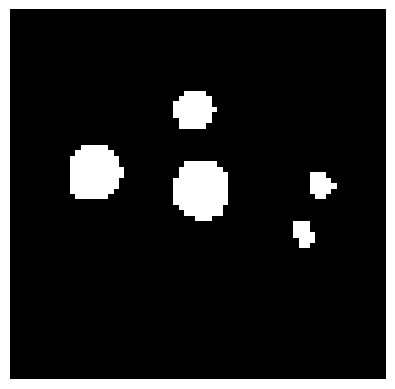

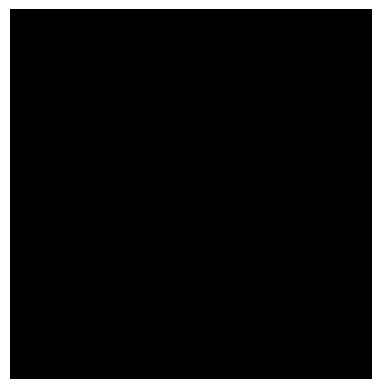

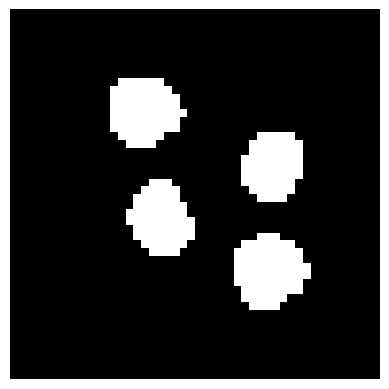

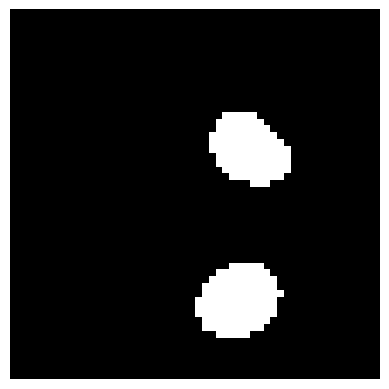

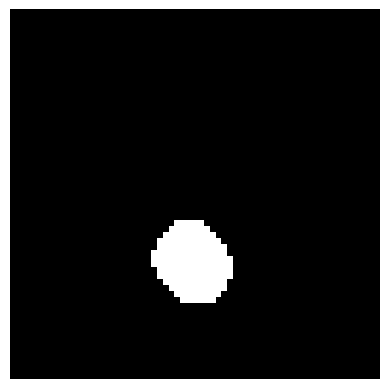

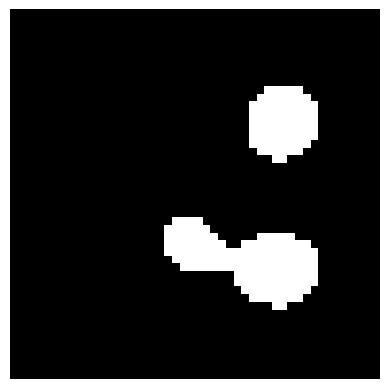

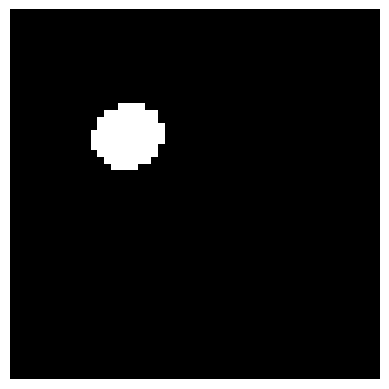

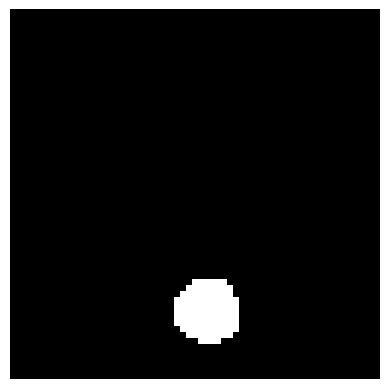

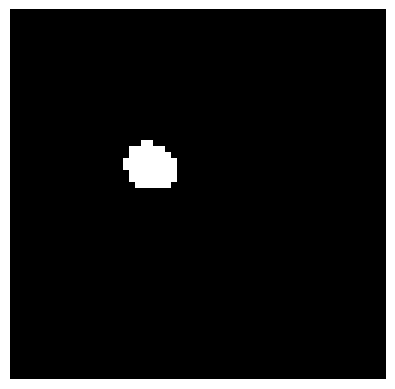

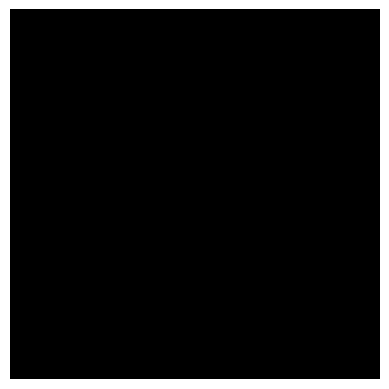

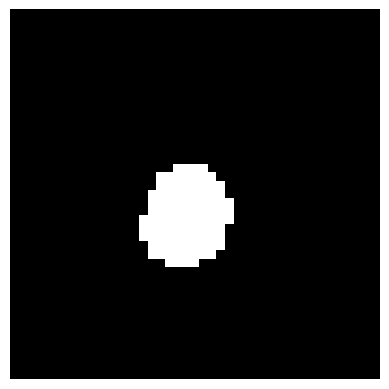

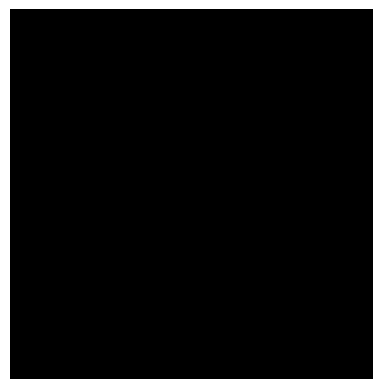

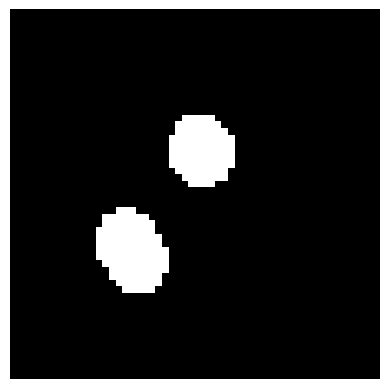

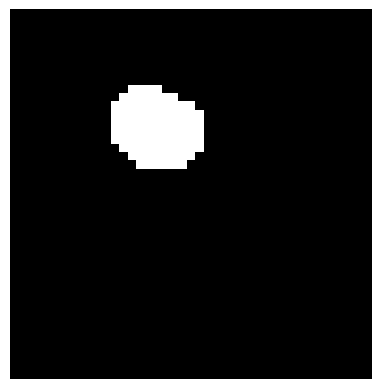

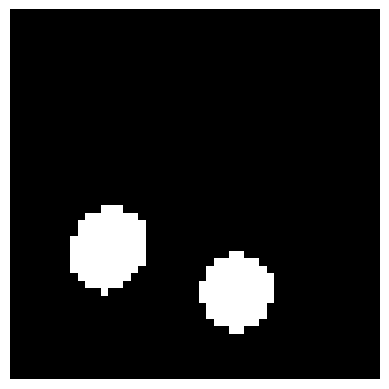

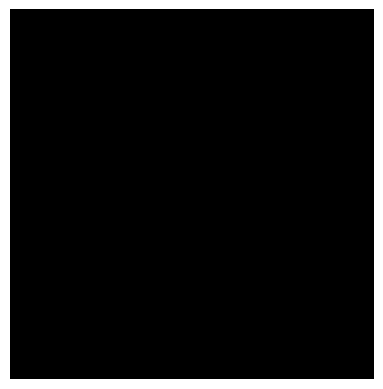

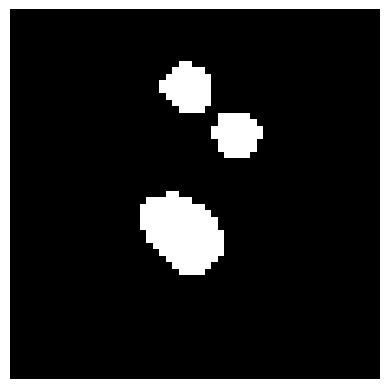

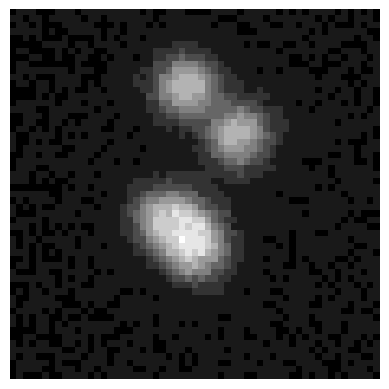

63 0


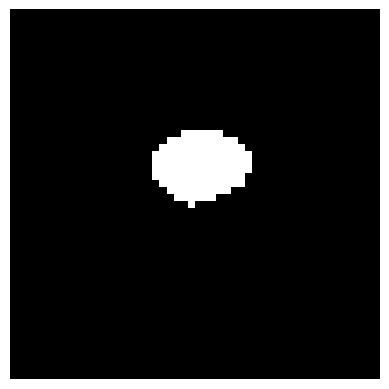

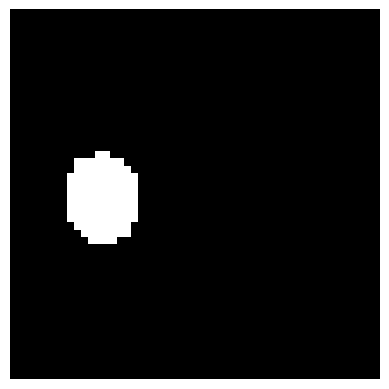

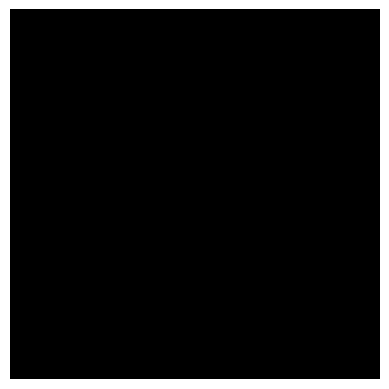

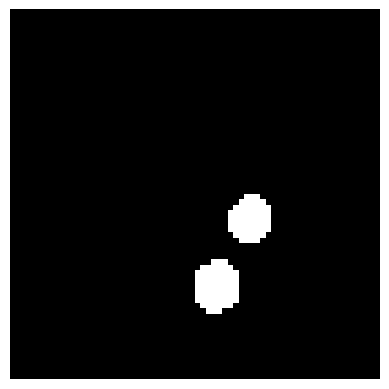

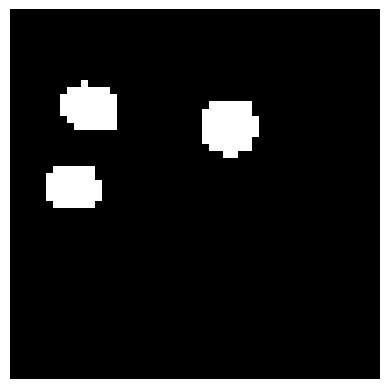

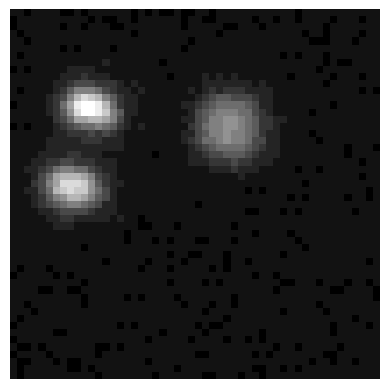

68 0


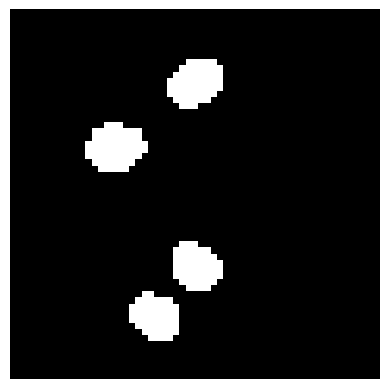

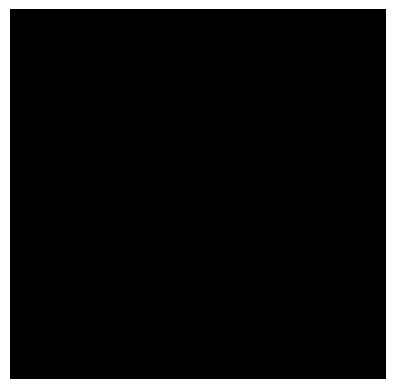

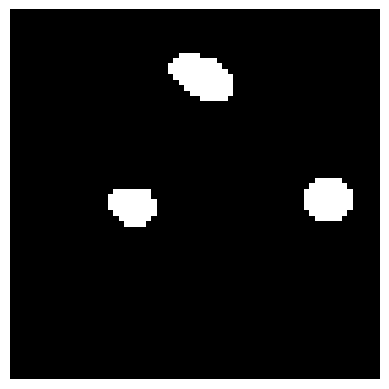

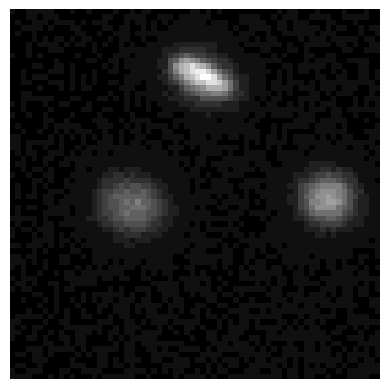

71 0


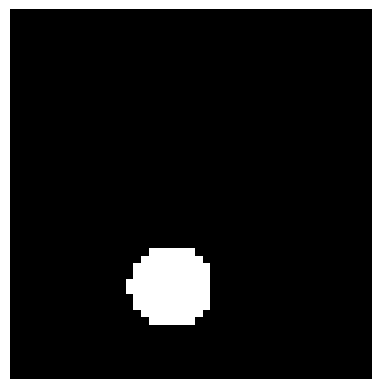

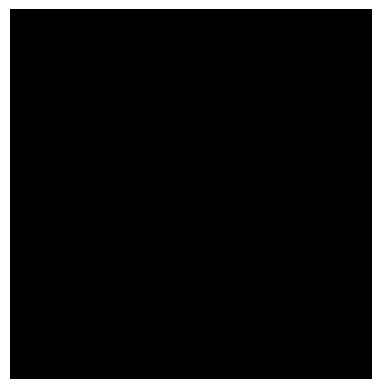

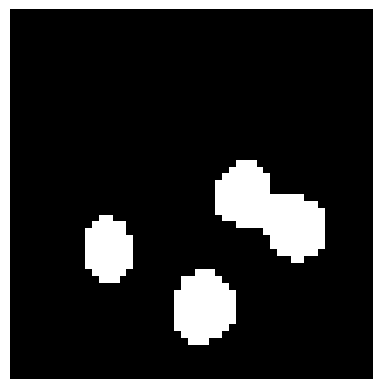

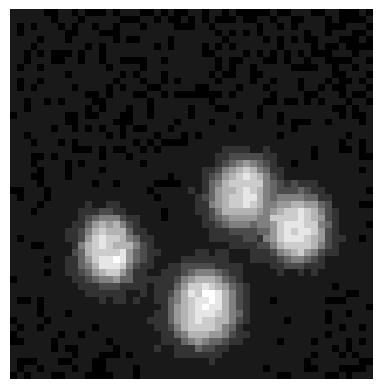

74 0


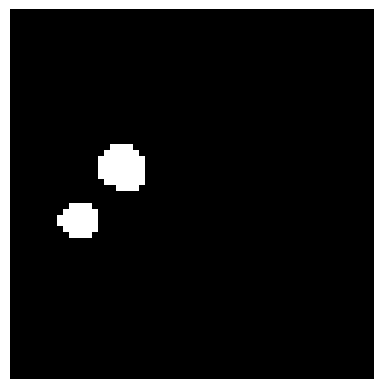

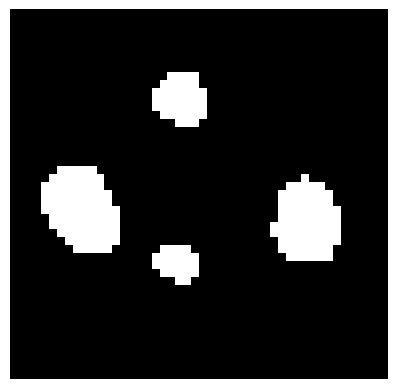

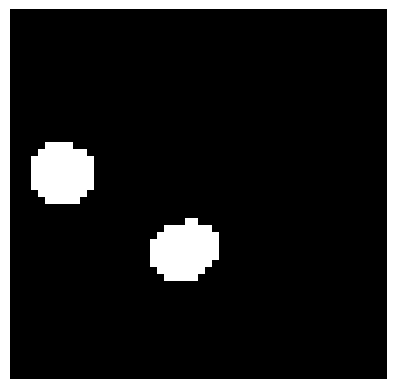

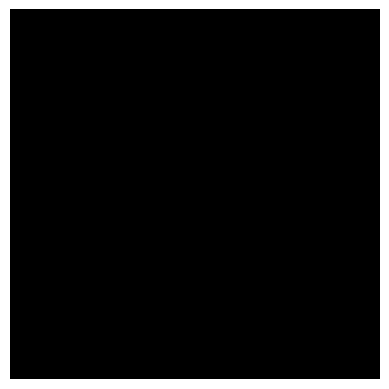

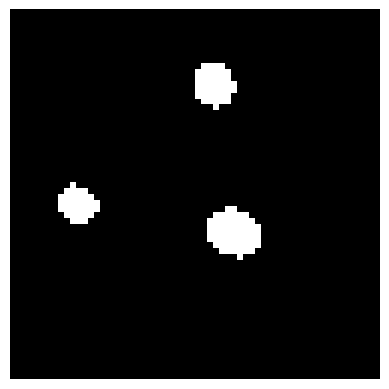

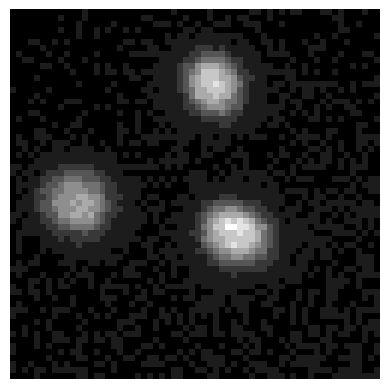

79 0


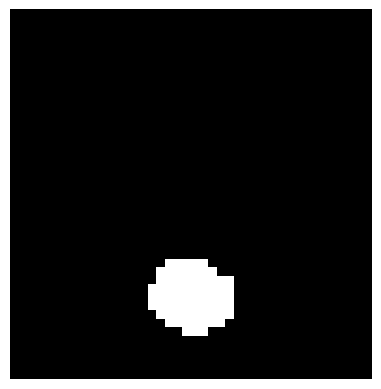

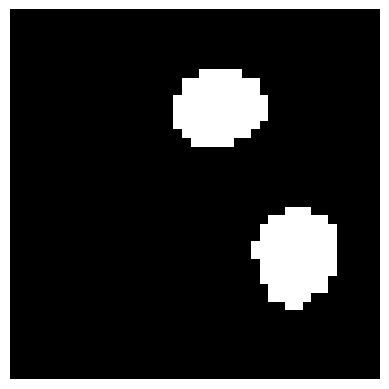

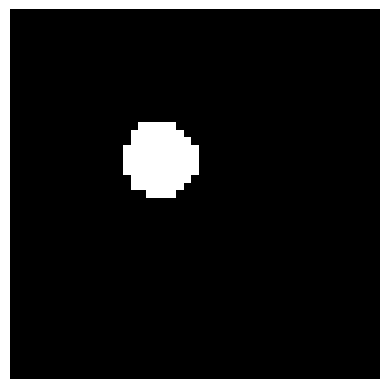

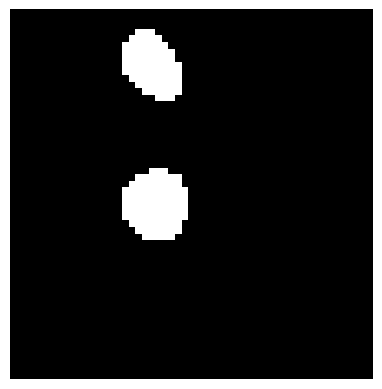

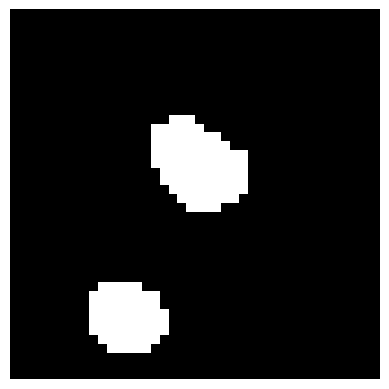

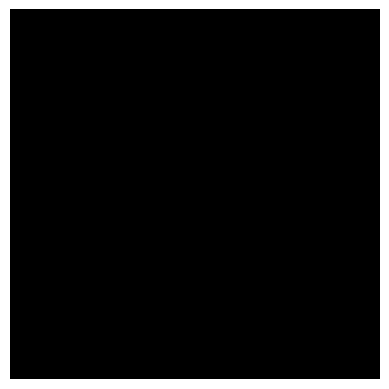

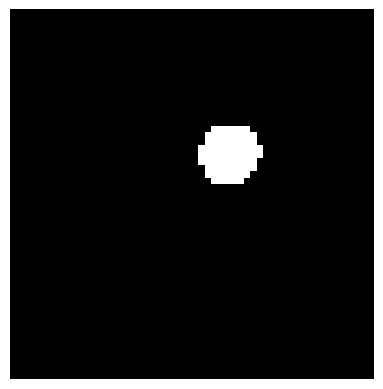

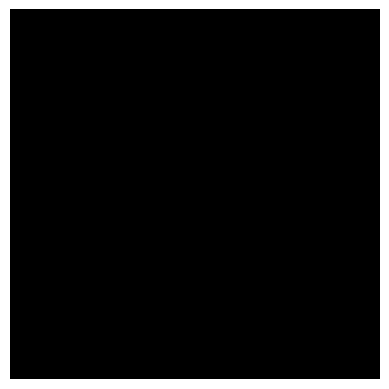

In [68]:
for i in range(88):
    for j in range(1):
        analyze(gray_image, cells_stack, i, j)